# Module 1: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Learn when and how simulated data is appropriate for statistical analysis.
2. Experiment with the processes involved in simulating linear data.
3. Observe how the variance of data effects the best-fit line, even for the same underlying population.
4. Recognize the effects of standardizing predictors.
5. Interpreting the coefficients of linear models on both original and standardized data scales.


General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

**A Quick Note On Peer-Reviewed Assignments**

Welcome to your first peer reviewed assignment! These assignments will be a more open form than the auto-graded assignments, and will focus on interpretation and visualization rather than "do you get the right numbers?" These assignments will be graded by your fellow students (except in the specific cases where the work needs to be graded by a proctor) so please make your answers as clear and concise as possible.

In [1]:
# This cell loads the necesary libraries for this assignment
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Problem 1: Simulating Data

We're going to let you in on a secret. The turtle data from the autograded assignment was simulated...fake data! Gasp! Importantly, simulating data, and applying statistical models to simulated data, are very important tools in data science.

Why do we use simulated data? Real data can be messy, noisy, and we almost never *really* know the underlying process that generated real data. Working with real data is always our ultimate end goal, so we will try to use as many real datasets in this course as possible. However, applying models to simulated data can be very instructive: such applications help us understand how models work in ideal settings, how robust they are to changes in modeling assumptions, and a whole host of other contexts.

And in this problem, you are going to learn how to simulate your own data.

#### 1. (a) A Simple Line

Starting out, generate $10$ to $20$ data points for values along the x-axis. Then generate data points along the y-axis using the equation $y_i=\beta_0 + \beta_1x_i$. Make it a straight line, nothing fancy.

Plot your data (using ggplot!) with your $\mathbf{x}$ data along the x-axis and your $\mathbf{y}$ data along the y-axis.

In the *Markdown* cell below the `R` cell, describe what you see in the plot.

**Tip**: You can generate your x-data *deterministically*, e.g., using either `a:b` syntax or the `seq()` function, or *randomly* using something like `runif()` or `rnorm()`. In practice, it won't matter all that much which one you choose.

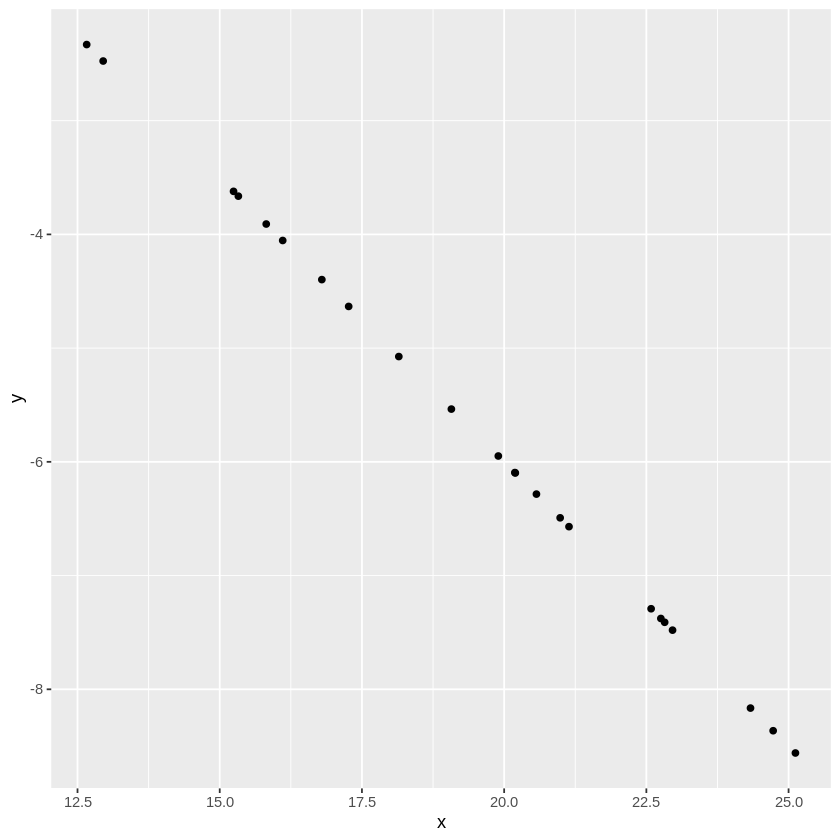

In [7]:
# Your Code Here
x <- rnorm(mean = 21, sd = 4, n = 23)
y <- 4 - (1/2) * x
data <- data.frame(x, y)

ggplot(data = data, aes(x = x, y = y)) +
    geom_point()

There is a scatterplot of points that all lie on the same line.

#### 1. (b) The Error Component

That is a perfect set of data points, but that is a problem in itself. In almost any real life situation, when we measure data, there will be some error in those measurements. Recall that our simple linear model is of the form:

$$ y_i = \beta_0 + \beta_1x_i + \epsilon_i,  \qquad \epsilon_i \sim N(0, \sigma^2) $$

Add an error term to your y-data following the formula above. Plot at least three different plots (using ggplot!) with the different values of $\sigma^2$. 

How does the value of $\sigma^2$ affect the final data points? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: To randomly sample from a normal distribution, check out the `rnorm()` function.

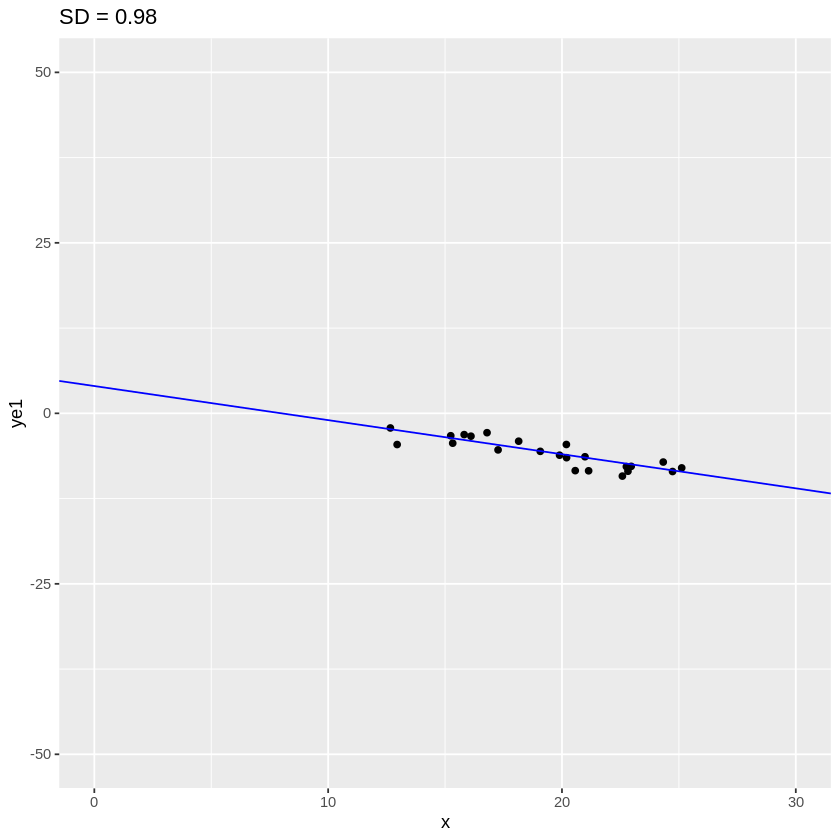

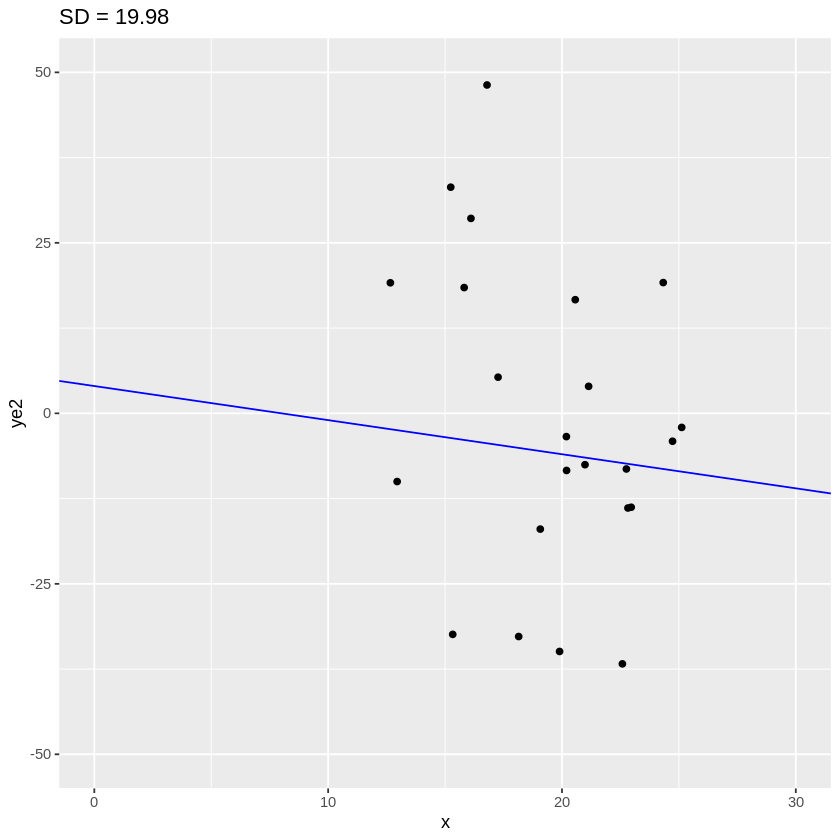

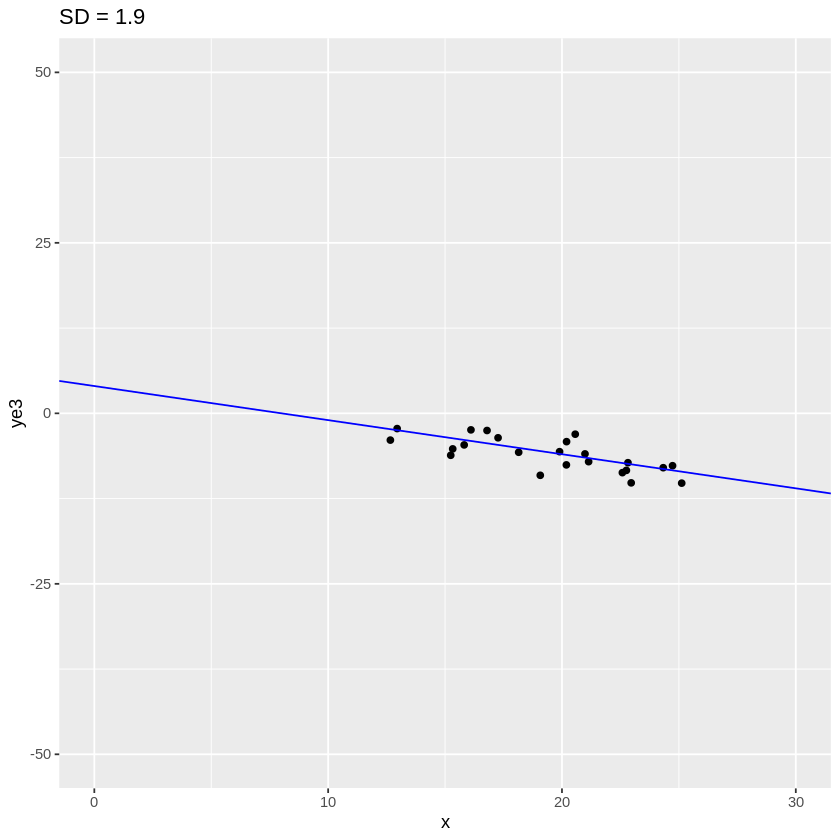

In [15]:
# Your Code Here
e1 <- rnorm(n = 23, mean = 0, sd = 0.98)
e2 <- rnorm(n = 23, mean = 0, sd = 19.98)
e3 <- rnorm(n = 23, mean = 0, sd = 1.9)

ye1 <- y + e1
ye2 <- y + e2
ye3 <- y + e3

data$ye1 <- ye1
data$ye2 <- ye2
data$ye3 <- ye3

ggplot(data, aes(x = x, y = ye1)) +
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    ylim(-50, 50) +
    xlim(0, 30) +
    labs(title = "SD = 0.98")

ggplot(data, aes(x = x, y = ye2)) +
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    ylim(-50, 50) +
    xlim(0, 30) +
    labs(title = "SD = 19.98")

ggplot(data, aes(x = x, y = ye3)) + 
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    ylim(-50, 50) +
    xlim(0, 30) +
    labs(title = "SD = 1.9")

As the standard deviation increases, the trends in the data become less clear. In other words, the points move more erratically from the original line.

# Problem 2: The Effects of Variance on Linear Models

Once you've completed **Problem 1**, you should have three different "datasets" from the same underlying data function but with different variances. Let's see how those variance affect a best fit line.

Use the `lm()` function to fit a best-fit line to each of those three datasets. Add that best fit line to each of the plots and report the slopes of each of these lines.

Do the slopes of the best-fit lines change as $\sigma^2$ changes? Type your answer in the *Markdown* cell below the `R` cell.

**Tip**: The `lm()` function requires the syntax `lm(y~x)`.

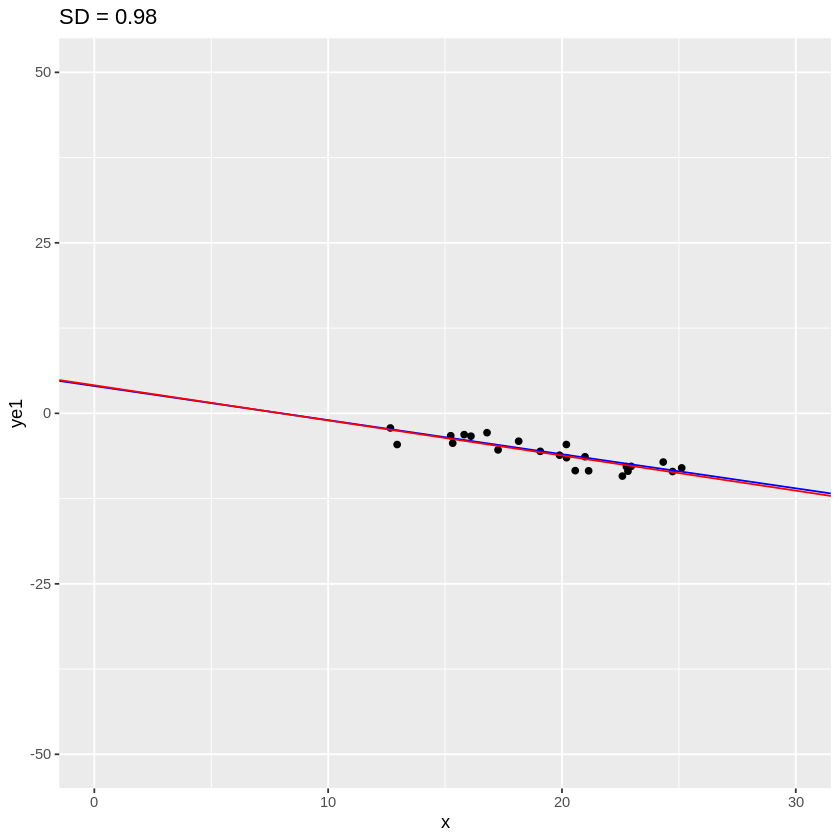

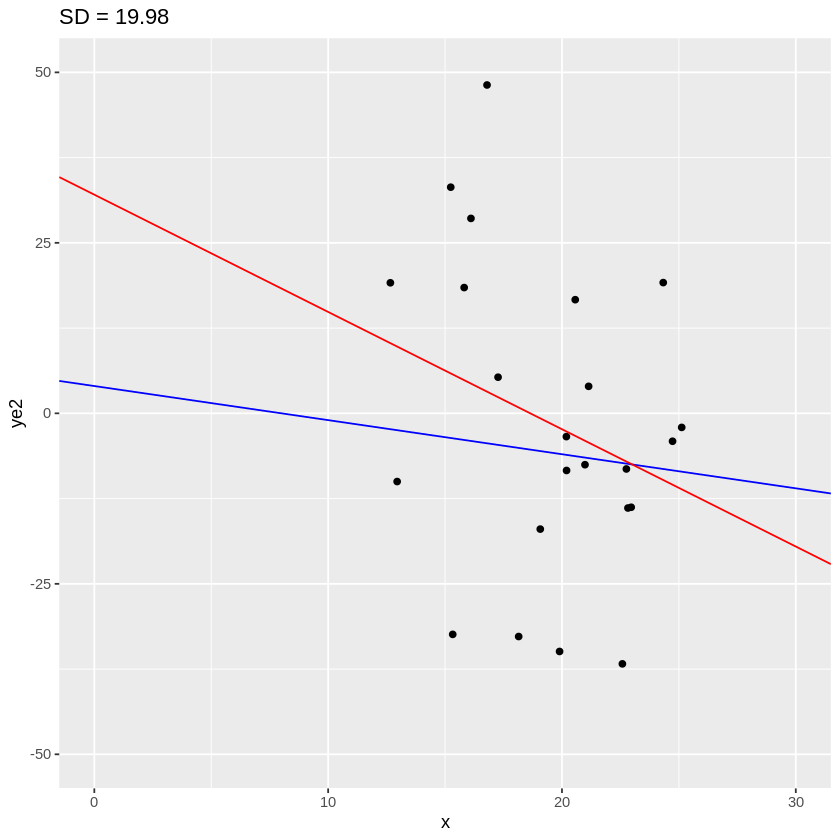

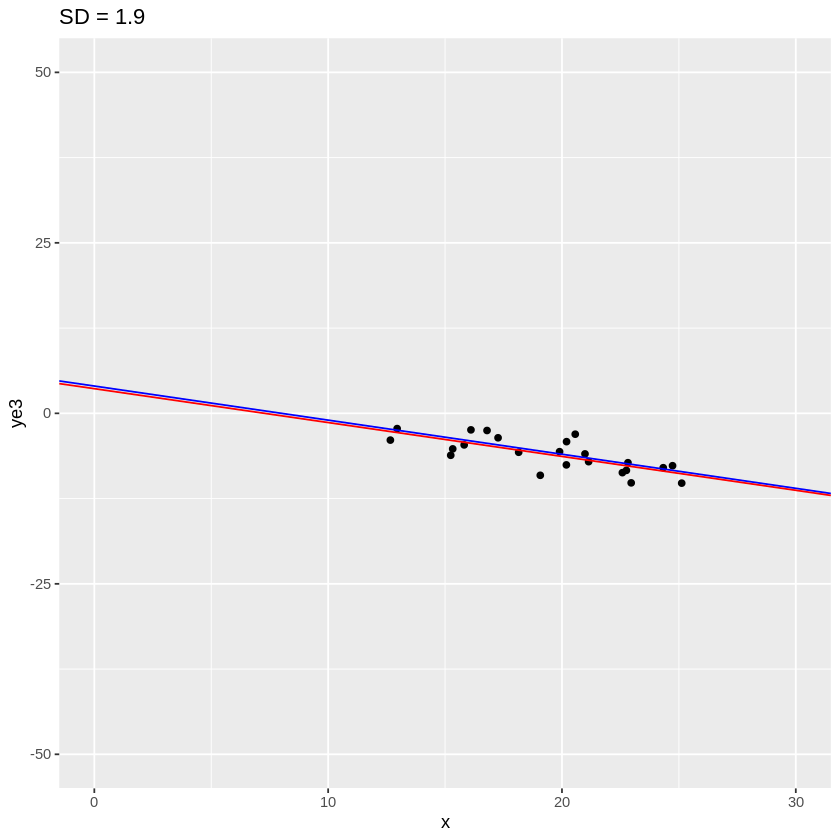

In [24]:
# Your Code Here
model1 <- lm(formula = ye1 ~ x, data = data)
model2 <- lm(formula = ye2 ~ x, data = data)
model3 <- lm(formula = ye3 ~ x, data = data)

ggplot(data, aes(x = x, y = ye1)) +
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    geom_abline(slope = model1$coefficients[2], intercept = model1$coefficients[1], color = "red") +
    ylim(-50, 50) +
    xlim(0, 30) +
    labs(title = "SD = 0.98")

ggplot(data, aes(x = x, y = ye2)) +
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    geom_abline(slope = model2$coefficients[2], intercept = model2$coefficients[1], color = "red") +
    ylim(-50, 50) +
    xlim(0, 30) +
    labs(title = "SD = 19.98")

ggplot(data, aes(x = x, y = ye3)) + 
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    geom_abline(slope = model3$coefficients[2], intercept = model3$coefficients[1], color = "red") +
    ylim(-50, 50) +
    xlim(0, 30) +
    labs(title = "SD = 1.9")

The model is much closer to the generating equation when the standard deviation is smaller.

# Problem 3: Interpreting the Linear Model

Choose one of the above three models and write out the actual equation of that model. Then in words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your predictor affects your response. Does this relationship make sense?

In [26]:
# Your Code Here
print(model3$coefficients)

(Intercept)           x 
  3.6130787  -0.4967515 


The equation for model three (rounded) is:
    ***y = 3.61 - 0.50 * x***
 
This makes sense because the slope was almost exactly spot on while the intercept was only a little off. The 1.9 standard deviation doesn't affect the slope as much as it does the intercept in the model.


# Problem 4: The Effects of Standardizing Data

We spent some time standardizing data in the autograded assignment. Let's do that again with your simulated data. 

Using the same model from **Problem 3**, standardize your simulated predictor. Then, using the `lm()` function, fit a best fit line to the standardized data. Using ggplot, create a scatter plot of the standardized data and add the best fit line to that figure.

Warning message:
“Removed 10 rows containing missing values (geom_point).”


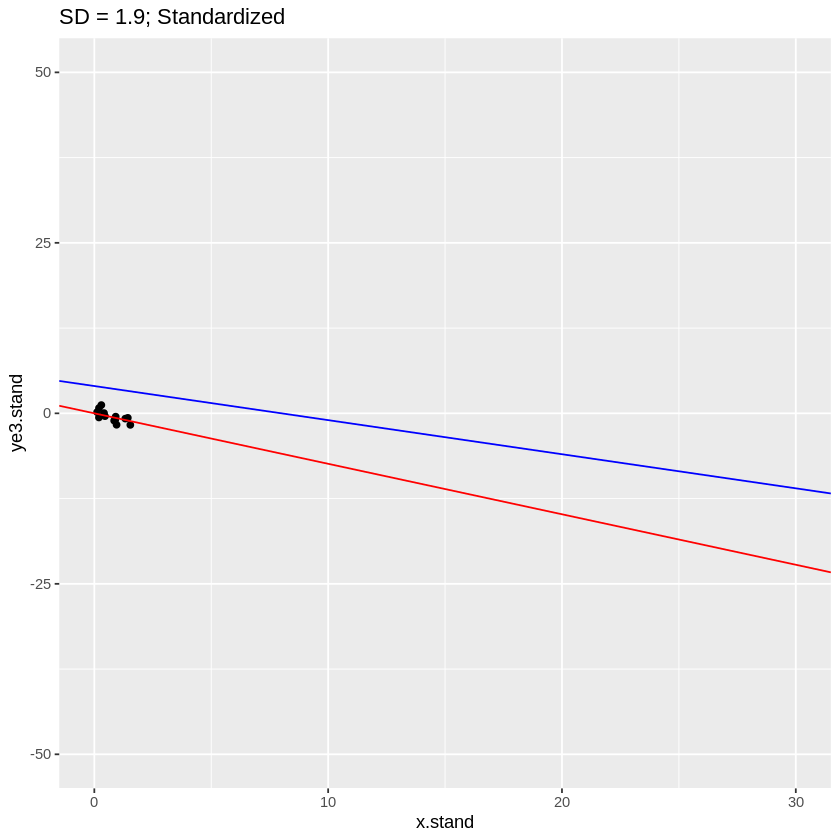

In [38]:
# Your Code Here
ye3.stand <- (ye3 - mean(ye3)) / sd(ye3)
x.stand <- (x - mean(x)) / sd(x)

data$ye3.stand <- ye3.stand
data$x.stand <- x.stand

model3.stand <- lm(formula = ye3.stand ~ x.stand, data = data)

ggplot(data, aes(x = x.stand, y = ye3.stand)) + 
    geom_point() +
    geom_abline(slope = (-1/2), intercept = 4, color = "blue") +
    geom_abline(slope = model3.stand$coefficients[2], intercept = model3.stand$coefficients[1], color = "red") +
    ylim(-50, 50) +
    xlim(0, 30) +    
    labs(title = "SD = 1.9; Standardized")

The plots are now much closer together, the data is centered around 0, and the regression line fits better. However, the line is much different from the original line because the original line hasn't been "standardized." Therefore, one must be careful not to compare original data to standardized data.

# Problem 5: Interpreting the Standardized Model

Write out the expression for your standardized model. In words, in the *Markdown* cell below the `R` cell, describe how a $1$ unit increase in your standardized predictor affects the response. Is this value different from the original model? If yes, then what can you conclude about interpretation of standardized predictors vs. unstandardized predictors.

In [42]:
# Your Code Here

print(model3.stand$coefficients)

  (Intercept)       x.stand 
-8.955562e-17 -7.402257e-01 


The new (rounded) regressionline for the standardized data is:


*y = 0.00 - 0.74 * x*


Standardizing the data essentially eliminated the intercept and slightly changed the slope.